# **Load Important Libraries**

In [4]:
!pip install yfinance

In [14]:
pip install keras tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data collection
import yfinance as yf

#Data Scaling
from sklearn.preprocessing import MinMaxScaler

#LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

C:\Users\Thurlo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Load the data**

In [29]:
#Load data (Amazon)

df = pd.read_csv('amazon_stock_data.csv')
df = df.iloc[2000: df.shape[0]]
df

,Date,Open,High,Low,Close,Volume
2000,2005-04-28 00:00:00-04:00,1.583000,1.646000,1.581500,1.626000,289456000
2001,2005-04-29 00:00:00-04:00,1.643000,1.644500,1.576000,1.618000,210470000
2002,2005-05-02 00:00:00-04:00,1.615000,1.664000,1.605000,1.655000,181960000
2003,2005-05-03 00:00:00-04:00,1.647000,1.678000,1.644500,1.660500,135558000
2004,2005-05-04 00:00:00-04:00,1.667500,1.706000,1.663500,1.698000,155132000
...,...,...,...,...,...,...
6893,2024-10-07 00:00:00-04:00,182.949997,183.600006,180.250000,180.800003,42364200
6894,2024-10-08 00:00:00-04:00,181.919998,183.089996,180.919998,182.720001,26372100
6895,2024-10-09 00:00:00-04:00,182.820007,185.850006,182.050003,185.169998,26343100
6896,2024-10-10 00:00:00-04:00,187.130005,188.130005,185.830002,186.649994,27785000


# Splitting the data

In [30]:
# Create a new dataframe with only the 'Close column
close = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = close.values
# Get the number of rows to train the model on
training_len = int(np.ceil( len(dataset) * .9 ))

training_len

4409

In [31]:
# Using Min Max Scalar to scale the data
sc = MinMaxScaler(feature_range=(0,1))

#Scaling the close (closing price) data
sc_close = sc.fit_transform(close)
sc_close

array([[0.00162308],
       [0.00158282],
       [0.00176903],
       ...,
       [0.92536355],
       [0.93281207],
       [0.94373332]])

In [32]:
# Create the training data set
# Create the scaled training data set
train_data = sc_close[0:int(training_len), :]

# creating empty sets
x_train = []
y_train = []

# Split the data into x_train and y_train data sets
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)


[array([0.00162308, 0.00158282, 0.00176903, 0.00179671, 0.00198544,
       0.00198544, 0.00212636, 0.00215656, 0.00205338, 0.00195021,
       0.00195776, 0.00197034, 0.00213139, 0.0021792 , 0.00233019,
       0.00239561, 0.00237297, 0.00241826, 0.00238303, 0.00231006,
       0.00236038, 0.00237297, 0.00237548, 0.00262461, 0.00260196,
       0.00239561, 0.00244091, 0.00233522, 0.00220437, 0.00229747,
       0.00223456, 0.00221443, 0.00225721, 0.00230754, 0.0023931 ,
       0.00232515, 0.00242078, 0.00234277, 0.00230251, 0.00235535,
       0.00225218, 0.00212133, 0.00192253, 0.00183194, 0.00176651,
       0.00172122, 0.00201564, 0.0020106 , 0.00198544, 0.00218172,
       0.00239561, 0.00257679, 0.00262712, 0.00279824, 0.00278817,
       0.00279824, 0.00304484, 0.00304484, 0.00298948, 0.00298948])]
[0.002989483871373661]
[array([0.00162308, 0.00158282, 0.00176903, 0.00179671, 0.00198544,
       0.00198544, 0.00212636, 0.00215656, 0.00205338, 0.00195021,
       0.00195776, 0.00197034, 0.00

In [33]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.00162308, 0.00158282, 0.00176903, ..., 0.00304484, 0.00298948,
        0.00298948],
       [0.00158282, 0.00176903, 0.00179671, ..., 0.00298948, 0.00298948,
        0.00298948],
       [0.00176903, 0.00179671, 0.00198544, ..., 0.00298948, 0.00298948,
        0.00293664],
       ...,
       [0.6956162 , 0.71096626, 0.70205818, ..., 0.59646999, 0.60039557,
        0.57553356],
       [0.71096626, 0.70205818, 0.69506259, ..., 0.60039557, 0.57553356,
        0.55187937],
       [0.70205818, 0.69506259, 0.68711075, ..., 0.57553356, 0.55187937,
        0.51388174]])

In [34]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4349, 60, 1)

# Model 1 : LSTM


In [35]:
#early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# LSTM

# Build the LSTM model
model = Sequential()

model.add(LSTM(64,return_sequences=True, input_shape= (x_train.shape[1], 1)))
#model.add(Dropout(0.2))


model.add(LSTM(128,return_sequences=False))
#model.add(Dropout(0.3))

model.add(Dense(64))
#model.add(Dropout(0.4))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


#Early stopping
early_stopping = EarlyStopping(monitor='loss', patience=5)

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=20, callbacks=[early_stopping])

C:\Users\Thurlo\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0092
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 3.3229e-04
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 2.8802e-04
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 2.5698e-04
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 2.1074e-04
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 1.9411e-04
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 1.8229e-04
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 1.8167e-04
Epoch 9/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 1.9304e-04
Epoch 10/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.7765e-04
Epoch 11/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 1.7663e-04
Epoch 12/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 1.4178e-04
Epoch 13/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 1.4021e-04
Epoch 14/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 1

In [37]:
# Create the testing data set
test_data = sc_close[training_len - 60: , :]


# Create the empty sets x_test and y_test
x_test = []
y_test = dataset[training_len:, :]

# Populating
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1 ))
x_test.shape

(489, 60, 1)

In [38]:
# Get the models predicted price values
predictions = model.predict(x_test)

#reshaping the prediction data
predictions = predictions.reshape(-1,1)

# transforming scaled data
predictions = sc.inverse_transform(predictions)

#convert predictions to an array
predictions = np.array(predictions)
predictions.shape

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


(489, 1)

In [39]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('rmse : ', rmse)

#Mean Square Error
from sklearn.metrics import mean_squared_error

# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(predictions,y_test)
print('mse : ' , mse)


#mean absolute error
mae = np.mean(np.abs(y_test - predictions))
print('mae : ', mae )

rmse :  2.9108291178639325
mse :  8.47292615340452
mae :  2.15651713802283


C:\Users\Thurlo\AppData\Local\Temp\ipykernel_23620\891492763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


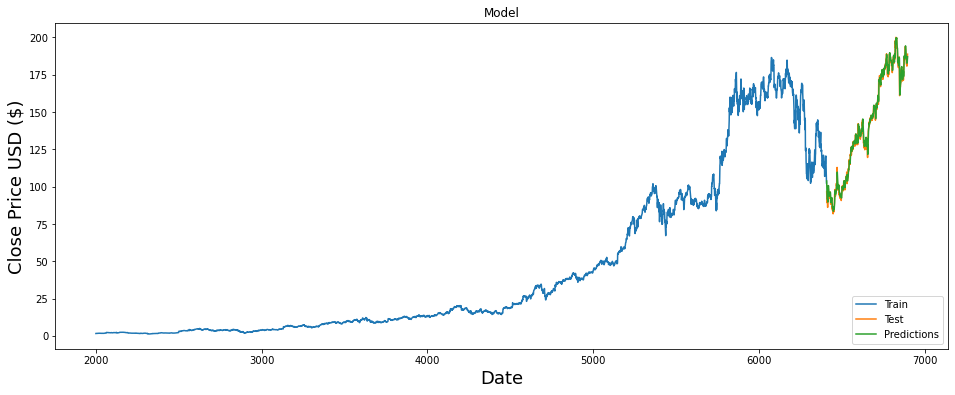

In [48]:
# Plot the data
train = close[:training_len]
valid = close[training_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [41]:
valid

,Close,Predictions
6409,96.790001,103.825836
6410,92.120003,99.724098
6411,89.300003,95.392708
6412,90.980003,92.021629
6413,90.529999,91.677925
...,...,...
6893,180.800003,185.691864
6894,182.720001,182.983887
6895,185.169998,182.902451
6896,186.649994,185.072998


# **Making Predictions using a different dataset**

In [42]:
#Load data (Tesla)

Tesla = yf.Ticker('TSLA')
Tesla = Tesla.history("max")
Tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-08 00:00:00-04:00,243.559998,246.210007,240.559998,244.500000,56303200,0.0,0.0
2024-10-09 00:00:00-04:00,243.820007,247.429993,239.509995,241.050003,66289500,0.0,0.0
2024-10-10 00:00:00-04:00,241.809998,242.789993,232.339996,238.770004,83087100,0.0,0.0


In [43]:
#Extracting data for predictions
Tesla = Tesla['Close'].tail(61)
Tesla

Date
2024-07-19 00:00:00-04:00    239.199997
2024-07-22 00:00:00-04:00    251.509995
2024-07-23 00:00:00-04:00    246.380005
2024-07-24 00:00:00-04:00    215.990005
2024-07-25 00:00:00-04:00    220.250000
                                ...    
2024-10-08 00:00:00-04:00    244.500000
2024-10-09 00:00:00-04:00    241.050003
2024-10-10 00:00:00-04:00    238.770004
2024-10-11 00:00:00-04:00    217.800003
2024-10-14 00:00:00-04:00    219.160004
Name: Close, Length: 61, dtype: float64

In [44]:
# extracting dependent and independent variables
data_test = Tesla.head(60).values

#Scaling the extracted data
sc_test_x = sc.transform(data_test.reshape(-1,1))

#Reshaping the scaled data
sc_test_x = sc_test_x.reshape(-1,60)

sc_test_x

C:\Users\Thurlo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[1.19728579, 1.25923957, 1.23342135, 1.08047452, 1.10191423,
        1.09964948, 1.16155295, 1.11384194, 1.16140197, 1.08485303,
        1.03860158, 0.99436329, 1.00322099, 0.95852969, 0.99416193,
        1.        , 0.9873677 , 1.03940684, 1.00694529, 1.07116381,
        1.08112873, 1.11434525, 1.10619214, 1.11711331, 1.05364968,
        1.10226656, 1.06648334, 1.04635213, 1.02893861, 1.03160599,
        1.07101283, 1.05334772, 1.09768669, 1.15183961, 1.05400194,
        1.0818837 , 1.1317084 , 1.14157272, 1.15002779, 1.15244352,
        1.13477841, 1.14026415, 1.13689218, 1.22104062, 1.19250465,
        1.25164006, 1.27313015, 1.28697027, 1.27287849, 1.30428312,
        1.31017157, 1.29200308, 1.24670794, 1.20463372, 1.2520427 ,
        1.20548929, 1.22395966, 1.20659651, 1.19512173, 1.08958388]])

In [45]:
# Reshaping the scaled data to match the input shape of the model
sc_test_x = sc_test_x.reshape(1, 60, 1)

#predicting the new closing price using the Random forest model
pred_y = model.predict(sc_test_x)

#transforming prediction
prediction = sc.inverse_transform(pred_y.reshape(-1,1))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[220.79327]], dtype=float32)

In [46]:
# actual value of prediction
Tesla[60]

219.16000366210938

# Model

In [47]:
#Saving the model
model.save('LSTM.h5')